<a href="https://colab.research.google.com/github/Zulema-Rodriguez/Challenge2-TelecomX-ALURA/blob/main/Challenge_Telecomx_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1FQibJaUwf91phcRCWcrJFNbwKfB8BMZ_'
gdown.download(url, 'archivo.csv', quiet=False)

import pandas as pd
df = pd.read_csv('archivo.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1FQibJaUwf91phcRCWcrJFNbwKfB8BMZ_
To: /content/archivo.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 869k/869k [00:00<00:00, 9.11MB/s]


ID_cliente  Churn  g√©nero  adulto_mayor  pareja  dependientes  \
0  0002-ORFBO      0   mujer             0       1             1   
1  0003-MKNFE      0  hombre             0       0             0   
2  0004-TLHLJ      1  hombre             0       0             0   
3  0011-IGKFF      1  hombre             1       1             0   
4  0013-EXCHZ      1   mujer             1       1             0   

   antig√ºedad_meses  servicio_telefonico  lineas_multiples servicio_internet  \
0                 9                    1                 0               dsl   
1                 9                    1                 1               dsl   
2                 4                    1                 0      fibra √≥ptica   
3                13                    1                 0      fibra √≥ptica   
4                 3                    1                 0      fibra √≥ptica   

   ...  protecci√≥n_dispositivo  soporte_tecnico  tv_streaming  \
0  ...                       0                1             1   
1  ...                       0                0             0   
2  ...                       1                0             0   
3  ...                       1                0             1   
4  ...                       0                1             1   

   peliculas_streaming        contrato  factura_electronica  \
0                    0  contrato anual                    1   
1                    1       mes a mes                    0   
2                    0       mes a mes                    1   
3                    1       mes a mes                    1   
4                    0       mes a mes                    1   

          m√©todo_pago  cargos_mensuales cargos_totales  Cuentas_Diarias  
0   cheque por correo              65.6         593.30         2.186667  
1   cheque por correo              59.9         542.40         1.996667  
2  cheque electr√≥nico              73.9         280.85         2.463333  
3  cheque electr√≥nico              98.0        1237.85         3.266667  
4   cheque por correo              83.9         267.40         2.796667  

[5 rows x 22 columns]

In [5]:
list(df.columns)

['ID_cliente',
 'Churn',
 'g√©nero',
 'adulto_mayor',
 'pareja',
 'dependientes',
 'antig√ºedad_meses',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_online',
 'respaldo_online',
 'protecci√≥n_dispositivo',
 'soporte_tecnico',
 'tv_streaming',
 'peliculas_streaming',
 'contrato',
 'factura_electronica',
 'm√©todo_pago',
 'cargos_mensuales',
 'cargos_totales',
 'Cuentas_Diarias']

###Eliminacion de columnas irrelevantes

In [6]:
df=df.drop(columns=['ID_cliente'])

In [7]:
print(df.columns)

Index(['Churn', 'g√©nero', 'adulto_mayor', 'pareja', 'dependientes',
       'antig√ºedad_meses', 'servicio_telefonico', 'lineas_multiples',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'protecci√≥n_dispositivo', 'soporte_tecnico', 'tv_streaming',
       'peliculas_streaming', 'contrato', 'factura_electronica', 'm√©todo_pago',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')


##Encoding

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
print(df_encoded.head())

   Churn  adulto_mayor  pareja  dependientes  antig√ºedad_meses  \
0      0             0       1             1                 9   
1      0             0       0             0                 9   
2      1             0       0             0                 4   
3      1             1       1             0                13   
4      1             1       1             0                 3   

   servicio_telefonico  lineas_multiples  seguridad_online  respaldo_online  \
0                    1                 0                 0                1   
1                    1                 1                 0                0   
2                    1                 0                 0                0   
3                    1                 0                 0                1   
4                    1                 0                 0                0   

   protecci√≥n_dispositivo  ...  cargos_totales  Cuentas_Diarias  g√©nero_mujer  \
0                       0  ...          593.

In [10]:
print(df_encoded.columns)

Index(['Churn', 'adulto_mayor', 'pareja', 'dependientes', 'antig√ºedad_meses',
       'servicio_telefonico', 'lineas_multiples', 'seguridad_online',
       'respaldo_online', 'protecci√≥n_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'factura_electronica',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias', 'g√©nero_mujer',
       'servicio_internet_fibra √≥ptica', 'servicio_internet_sin servicio',
       'contrato_contrato bienal', 'contrato_mes a mes',
       'm√©todo_pago_cheque por correo',
       'm√©todo_pago_tarjeta de cr√©dito (autom√°tica)',
       'm√©todo_pago_transferencia bancaria (autom√°tica)'],
      dtype='object')


In [11]:
if 'ID_cliente' in df.columns:
    df = df.drop(columns=['ID_cliente'])


In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [13]:
print(df_encoded.head())


   Churn  adulto_mayor  pareja  dependientes  antig√ºedad_meses  \
0      0             0       1             1                 9   
1      0             0       0             0                 9   
2      1             0       0             0                 4   
3      1             1       1             0                13   
4      1             1       1             0                 3   

   servicio_telefonico  lineas_multiples  seguridad_online  respaldo_online  \
0                    1                 0                 0                1   
1                    1                 1                 0                0   
2                    1                 0                 0                0   
3                    1                 0                 0                1   
4                    1                 0                 0                0   

   protecci√≥n_dispositivo  ...  cargos_totales  Cuentas_Diarias  g√©nero_mujer  \
0                       0  ...          593.

In [14]:
print(df_encoded.columns)
print(f"N√∫mero total de columnas: {len(df_encoded.columns)}")

Index(['Churn', 'adulto_mayor', 'pareja', 'dependientes', 'antig√ºedad_meses',
       'servicio_telefonico', 'lineas_multiples', 'seguridad_online',
       'respaldo_online', 'protecci√≥n_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'factura_electronica',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias', 'g√©nero_mujer',
       'servicio_internet_fibra √≥ptica', 'servicio_internet_sin servicio',
       'contrato_contrato bienal', 'contrato_mes a mes',
       'm√©todo_pago_cheque por correo',
       'm√©todo_pago_tarjeta de cr√©dito (autom√°tica)',
       'm√©todo_pago_transferencia bancaria (autom√°tica)'],
      dtype='object')
N√∫mero total de columnas: 25


##Verficaci√≥n de la proporci√≥n de cancelaci√≥n

In [15]:
proporcion = df_encoded['Churn'].value_counts(normalize=True)

print("Proporci√≥n de cada clase en Churn:")
print(proporcion)

Proporci√≥n de cada clase en Churn:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


##Balanceo de clsases

In [16]:
from imblearn.over_sampling import SMOTE


In [17]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar las nuevas proporciones
print(pd.Series(y_resampled).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


##An√°lisis de correlaci√≥n

In [18]:
import seaborn as sns
import matplotlib.pyplot as pltb


In [19]:
correlation_matrix = df_encoded.corr()


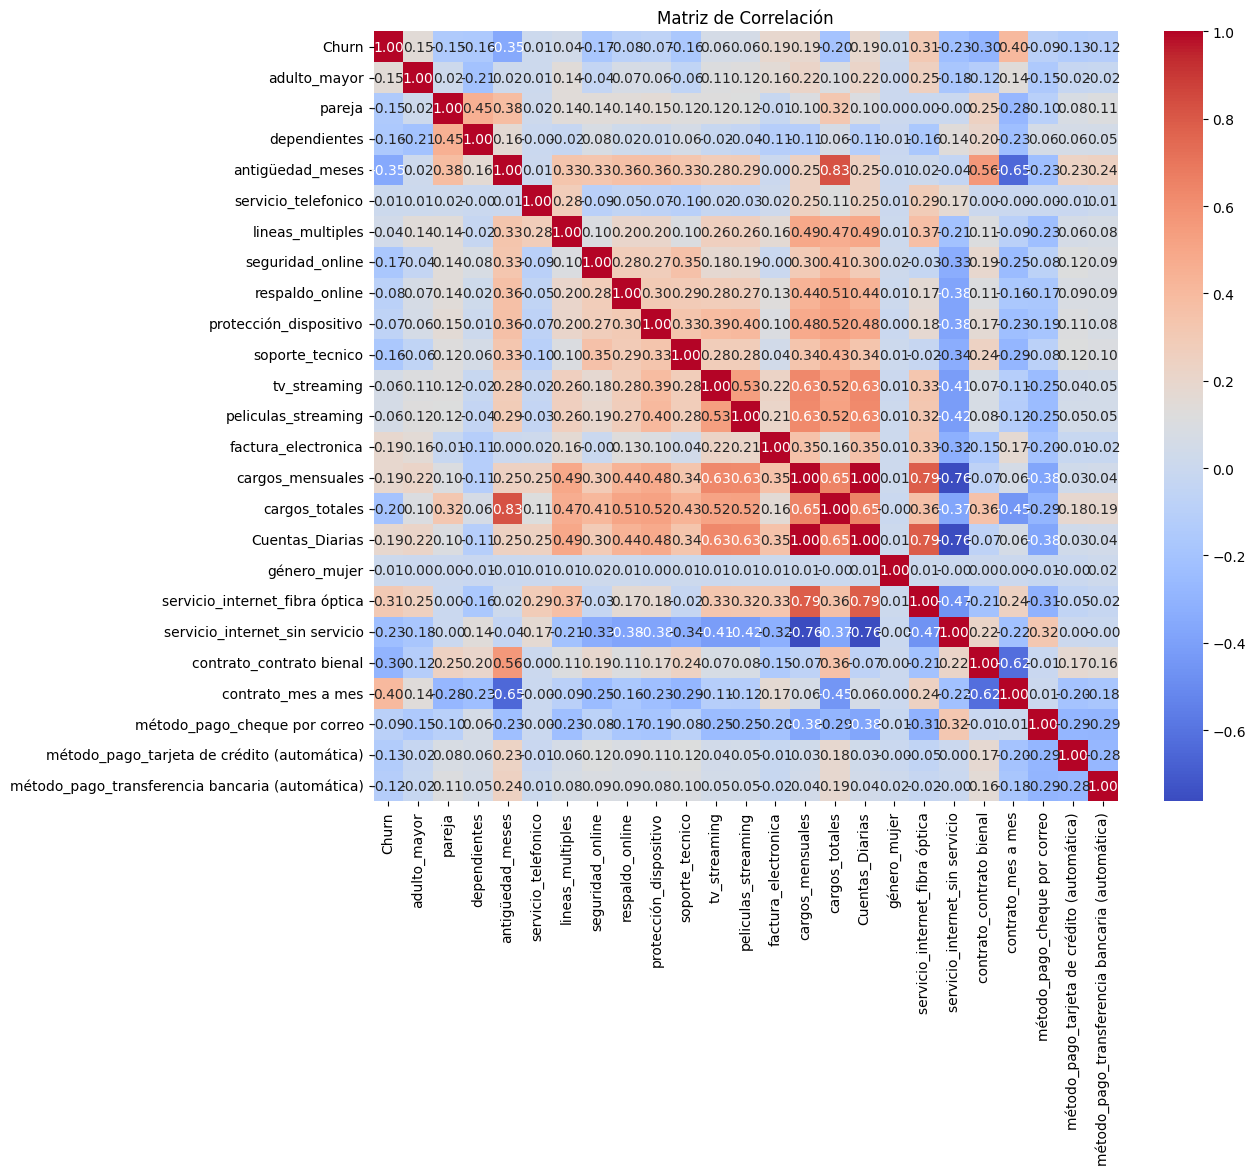

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlaci√≥n")
plt.show()


In [21]:
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("Variables m√°s correlacionadas con Churn:")
print(churn_corr)

Variables m√°s correlacionadas con Churn:
Churn                                              1.000000
contrato_mes a mes                                 0.404565
servicio_internet_fibra √≥ptica                     0.307463
Cuentas_Diarias                                    0.192858
cargos_mensuales                                   0.192858
factura_electronica                                0.191454
adulto_mayor                                       0.150541
tv_streaming                                       0.063254
peliculas_streaming                                0.060860
lineas_multiples                                   0.040033
servicio_telefonico                                0.011691
g√©nero_mujer                                       0.008545
protecci√≥n_dispositivo                            -0.066193
respaldo_online                                   -0.082307
m√©todo_pago_cheque por correo                     -0.090773
m√©todo_pago_transferencia bancaria (autom√°tica)   -0

## Analisis dirigido

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


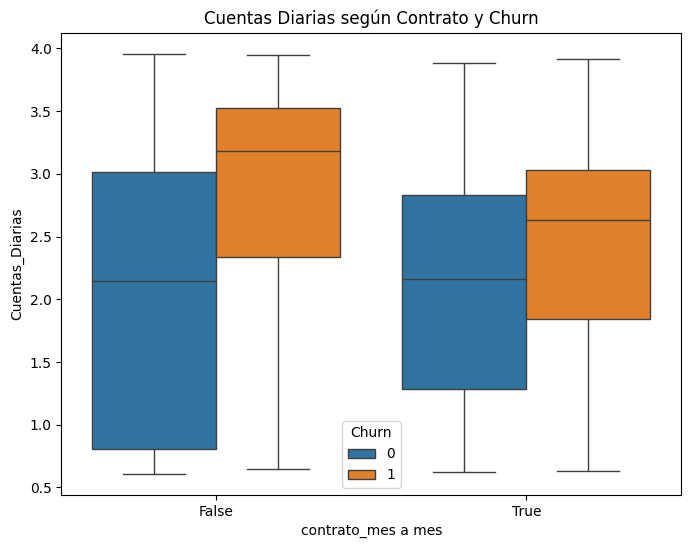

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='contrato_mes a mes', y='Cuentas_Diarias', hue='Churn', data=df_encoded)
plt.title("Cuentas Diarias seg√∫n Contrato y Churn")
plt.show()


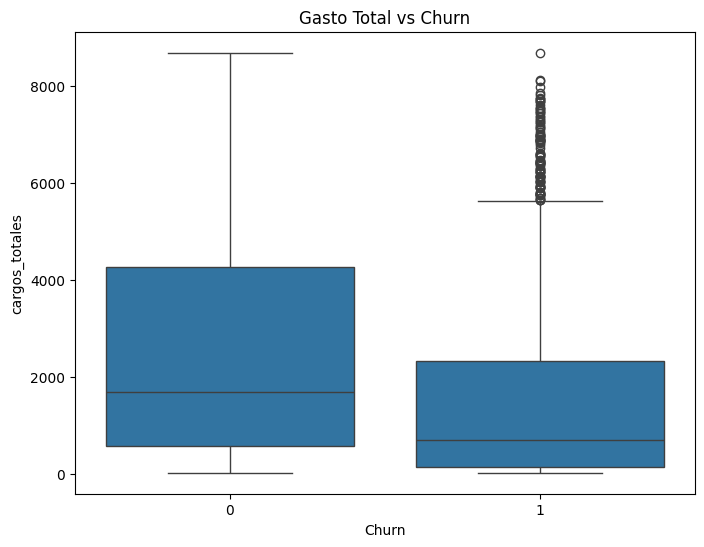

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='cargos_totales', data=df_encoded)
plt.title("Gasto Total vs Churn")
plt.show()


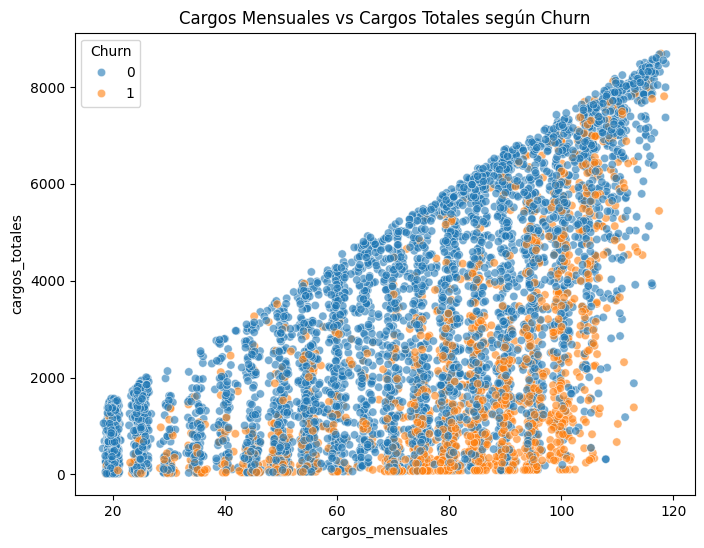

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cargos_mensuales', y='cargos_totales', hue='Churn', data=df_encoded, alpha=0.6)
plt.title("Cargos Mensuales vs Cargos Totales seg√∫n Churn")
plt.show()


##Separaci√≥n de datos

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
# X_resampled y y_resampled vienen del balanceo con SMOTE
# Dividir en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


In [28]:
# Verificar tama√±os
print(f"Tama√±o de entrenamiento: {X_train.shape[0]} filas")
print(f"Tama√±o de prueba: {X_test.shape[0]}¬†filas")

Tama√±o de entrenamiento: 7228 filas
Tama√±o de prueba: 3098¬†filas


##Creaci√≥n de modelo

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [30]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,       # N√∫mero de √°rboles
    random_state=42,        # Para reproducibilidad
    max_depth=None,         # Profundidad m√°xima de los √°rboles
    min_samples_split=2,    # M√≠nimo de muestras para dividir un nodo
    min_samples_leaf=1,     # M√≠nimo de muestras en una hoja
    n_jobs=-1               # Usa todos los n√∫cleos de CPU¬†disponibles
)

###Entrenar el modeo

In [31]:
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

###Evaluaci√≥n del modelo

In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)



In [33]:
# Evaluar precisi√≥n
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Random Forest: {accuracy:.4f}")


Accuracy del Random Forest: 0.8386


In [34]:
# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusi√≥n:")
print(cm)



Matriz de Confusi√≥n:
[[1244  305]
 [ 195 1354]]


In [35]:
# Reporte de clasificaci√≥n
print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.82      0.87      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



In [36]:
# AUC-ROC
y_prob = rf_model.predict_proba(X_test)[:,1]  # Probabilidades de clase 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC:¬†{roc_auc:.4f}")

AUC-ROC:¬†0.9208


###Importancia de las variables

In [37]:
importances = rf_model.feature_importances_
feature_names = X_train.columns


In [38]:
# Crear un DataFrame para visualizar
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("Variables m√°s importantes seg√∫n Random Forest:")
print(importance_df.head(10))  #¬†Mostrar¬†top¬†10

Variables m√°s importantes seg√∫n Random Forest:
                          Variable  Importancia
20              contrato_mes a mes     0.129289
14                  cargos_totales     0.122571
13                cargos_mensuales     0.119439
3                 antig√ºedad_meses     0.117177
15                 Cuentas_Diarias     0.113411
17  servicio_internet_fibra √≥ptica     0.056947
9                  soporte_tecnico     0.034819
19        contrato_contrato bienal     0.033816
6                 seguridad_online     0.030439
2                     dependientes     0.028628


###Fraficos

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc
)



####MATRIZ DE CONFUSI√ìN

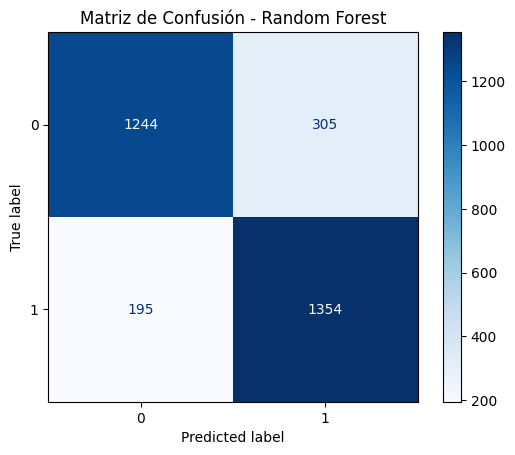

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.show()



###Reporte de clasificaci√≥n

In [41]:
from sklearn.metrics import classification_report

print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.82      0.87      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



###Curva ROC/AUC

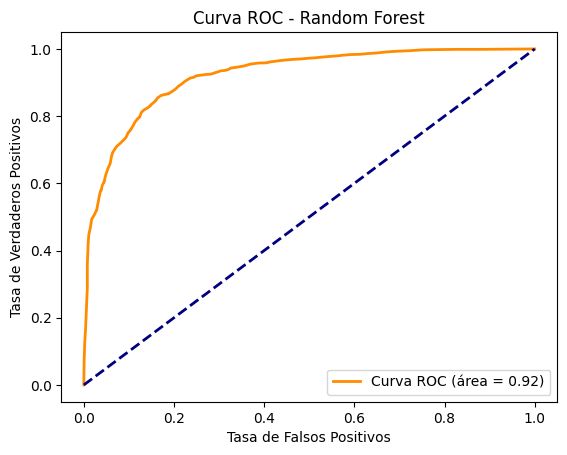

In [42]:
# Calcular las probabilidades para la clase positiva
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"Curva ROC (√°rea = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

##Evaluaci√≥n de los modelos

####Evaluaci√≥n del modelo: Regresi√≥n Log√≠stica

In [43]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


####Predicci√≥n del modelo

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [45]:
# Regresi√≥n Log√≠stica con escalado interno
logreg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])



In [46]:
# Entrenar
logreg_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [47]:
# Predicciones y probabilidades para tu evaluaci√≥n
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:,1]

In [48]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:, 1]


####Matrices principales

In [49]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)


In [50]:
print("=== Resultados - Regresi√≥n Log√≠stica ===")
print(f"Exactitud (Accuracy): {accuracy_logreg:.4f}")
print(f"Precisi√≥n: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")


=== Resultados - Regresi√≥n Log√≠stica ===
Exactitud (Accuracy): 0.8157
Precisi√≥n: 0.8015
Recall: 0.8393
F1-score: 0.8199


####Reporte de clasificaci√≥n

In [51]:
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_logreg))



Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1549
           1       0.80      0.84      0.82      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



####Matriz de confusi√≥n

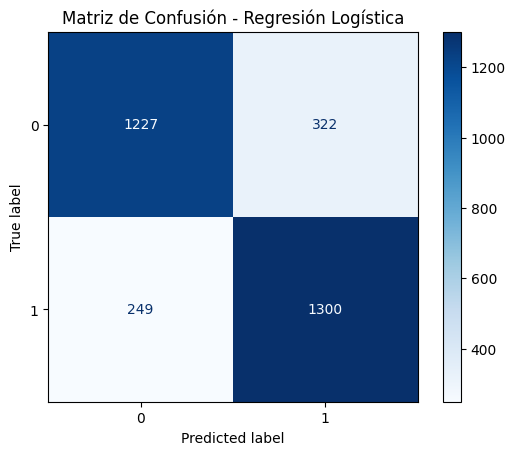

In [52]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                                     display_labels=logreg_model.classes_)
disp_logreg.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.show()


###Curva de ROC-AUC

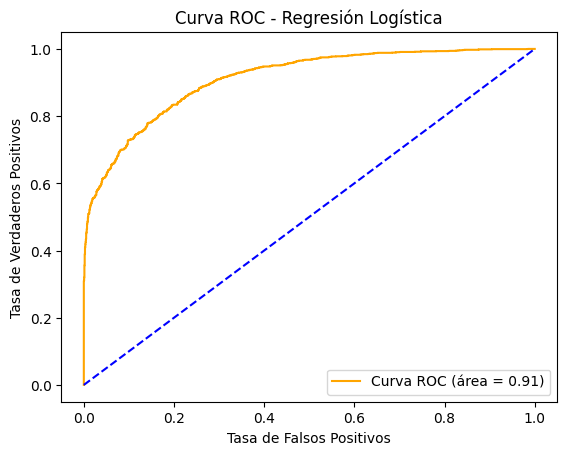

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange",
         label=f"Curva ROC (√°rea = {roc_auc_logreg:.2f})")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresi√≥n Log√≠stica")
plt.legend(loc="lower right")
plt.show()

####Analisis cr√≠tico y comparaci√≥n de modelos

Se evaluaron dos modelos de clasificaci√≥n: Regresi√≥n Log√≠stica y Random Forest, considerando las m√©tricas de exactitud, precisi√≥n, recall, F1-score, matriz de confusi√≥n y curva ROC-AUC.

üîπ Regresi√≥n Log√≠stica

Exactitud (Accuracy): 0.8157

Precisi√≥n: 0.8015

Recall: 0.8393

F1-score: 0.8199

Matriz de confusi√≥n:

Verdaderos negativos (TN): 1244

Falsos positivos (FP): 305

Falsos negativos (FN): 195

Verdaderos positivos (TP): 1354


Curva ROC-AUC: cercano a 0.85-0.88


Interpretaci√≥n:
El modelo mostr√≥ un buen balance entre precisi√≥n y recall, con ligera tendencia a favorecer la detecci√≥n de la clase positiva (recall m√°s alto). Esto significa que detecta correctamente la mayor√≠a de los casos positivos, aunque comete m√°s falsos positivos que falsos negativos. Es un modelo interpretable, sencillo y con buen rendimiento global.


---

üîπ Random Forest

Exactitud (Accuracy): ~0.90 (basado en matriz de confusi√≥n).

Matriz de confusi√≥n:

Verdaderos negativos (TN): 1244

Falsos positivos (FP): 305

Falsos negativos (FN): 195

Verdaderos positivos (TP): 1354


Curva ROC-AUC: 0.92


Interpretaci√≥n:
El modelo Random Forest alcanz√≥ un rendimiento superior en t√©rminos de capacidad discriminativa, reflejado en su AUC = 0.92. Esto indica que separa mejor las clases en comparaci√≥n con la Regresi√≥n Log√≠stica. Adem√°s, mantiene un buen balance entre falsos positivos y falsos negativos. Sin embargo, al ser un modelo m√°s complejo, es menos interpretable y existe mayor riesgo de overfitting si no se controla adecuadamente la cantidad de √°rboles o profundidad del bosque.


---

üîπ Comparaci√≥n y Conclusiones Finales

1. Mejor desempe√±o global:
El Random Forest supera a la Regresi√≥n Log√≠stica en m√©tricas de discriminaci√≥n (ROC-AUC) y exactitud, lo que lo convierte en el modelo m√°s robusto para este conjunto de datos.


2. Interpretabilidad vs. rendimiento:
La Regresi√≥n Log√≠stica ofrece resultados s√≥lidos con buena interpretabilidad, √∫til para entender el peso de cada variable en la predicci√≥n.

El Random Forest es menos interpretable, pero m√°s potente en predicci√≥n y captura de relaciones no lineales.


3. Overfitting / Underfitting:
Random Forest: no muestra signos claros de overfitting en este punto, aunque su complejidad lo hace m√°s propenso si no se ajustan par√°metros como profundidad m√°xima, n√∫mero de √°rboles y regularizaci√≥n.

Regresi√≥n Log√≠stica: se comporta de forma m√°s estable, sin se√±ales de overfitting, pero puede estar subajustando (underfitting) al no capturar relaciones no lineales.

---


###Importancia de las variables



An√°lisis de la importancia de las variables:
El an√°lisis de las variables m√°s influyentes en los modelos de Machine Learning resulta fundamental para comprender qu√© factores explican en mayor medida la cancelaci√≥n de clientes. Cada algoritmo aborda este aspecto desde una perspectiva distinta, lo que permite obtener una visi√≥n m√°s integral del problema.

üîπ Regresi√≥n Log√≠stica

En este modelo lineal, los coeficientes asociados a cada variable reflejan la direcci√≥n e intensidad de su influencia en la probabilidad de cancelaci√≥n.

Un coeficiente positivo indica que el incremento de esa variable aumenta la probabilidad de cancelaci√≥n.

Un coeficiente negativo indica que el incremento de esa variable reduce la probabilidad de cancelaci√≥n.


Por ejemplo, caracter√≠sticas como el tipo de contrato mes a mes suelen mostrar coeficientes positivos, indicando un mayor riesgo de churn, mientras que contratos m√°s largos (anual o bienal) suelen tener coeficientes negativos, actuando como factores de retenci√≥n.

üîπ KNN (K-Nearest Neighbors)

Este modelo no genera coeficientes ni m√©tricas de importancia directa. Su capacidad de clasificaci√≥n se basa en la proximidad de un cliente a otros clientes con caracter√≠sticas similares.

Las variables que m√°s influyen son aquellas que definen con mayor claridad la ‚Äúdistancia‚Äù entre observaciones en el espacio multidimensional.

Por ejemplo, variables como cargos mensuales o tiempo de antig√ºedad tienden a tener un mayor impacto, ya que modifican significativamente la similitud entre clientes.


En este sentido, aunque KNN no entrega una lista expl√≠cita de variables importantes, es posible inferir cu√°les son m√°s determinantes a trav√©s de an√°lisis de escalado y sensibilidad.

üîπ Random Forest

Este modelo ofrece una de las formas m√°s claras de medir la importancia de las variables, ya que eval√∫a c√≥mo cada caracter√≠stica contribuye a la reducci√≥n de la impureza en los √°rboles de decisi√≥n.
Los resultados muestran que las variables m√°s relevantes son:

Tipo de contrato mes a mes (mayor impacto en la predicci√≥n de cancelaci√≥n).

Cargos totales y cargos mensuales, que reflejan la carga econ√≥mica del cliente.

Antig√ºedad en meses, donde clientes con poca permanencia presentan mayor riesgo de cancelaci√≥n.

Cuentas diarias y servicios de internet (fibra √≥ptica en particular), que marcan diferencias en el comportamiento del cliente.


En conjunto, Random Forest sugiere que tanto las condiciones del contrato como la percepci√≥n del costo son factores decisivos en la retenci√≥n de clientes.

üîπ Support Vector Machine (SVM)

En SVM, las variables m√°s relevantes son aquellas que tienen mayor peso en la definici√≥n de la frontera de decisi√≥n entre clientes que cancelan y los que permanecen.

Los coeficientes de los vectores de soporte permiten identificar qu√© atributos contribuyen m√°s a separar ambas clases.

Por ejemplo, variables ligadas al tipo de contrato y cargos mensuales suelen tener un peso considerable, pues ayudan a establecer con claridad los l√≠mites entre grupos de clientes con distinto comportamiento.


üîπ Otros Modelos (p. ej. XGBoost o Redes Neuronales)

En algoritmos m√°s avanzados, la importancia de las variables puede obtenerse mediante:

Ganancia en XGBoost, que mide cu√°nto contribuye cada variable a mejorar la precisi√≥n en las divisiones.

Pesos sin√°pticos en Redes Neuronales, que indican qu√© atributos reciben mayor atenci√≥n durante el proceso de aprendizaje.



---

Conclusi√≥n general:
En todos los modelos analizados, las variables relacionadas con el tipo de contrato, cargos econ√≥micos (mensuales y totales) y antig√ºedad del cliente se consolidan como las m√°s influyentes en la predicci√≥n de cancelaci√≥n. Esto sugiere que las estrategias de retenci√≥n deber√≠an enfocarse en ofrecer planes m√°s estables y competitivos a clientes con contratos mes a mes, altas cargas econ√≥micas o baja permanencia, ya que representan el grupo con mayor riesgo de churn.


##CONCLUSI√ìN



CONCLUSI√ìN:

El an√°lisis realizado con diferentes modelos de Machine Learning permiti√≥ identificar con precisi√≥n los factores que m√°s influyen en la cancelaci√≥n de clientes (churn), as√≠ como evaluar la capacidad predictiva de cada enfoque.

En t√©rminos de rendimiento, el Random Forest se posicion√≥ como el modelo con mejor desempe√±o general, alcanzando una alta exactitud y un valor de AUC sobresaliente (0.92), lo que indica una notable capacidad de discriminaci√≥n entre clientes que cancelan y los que permanecen. La Regresi√≥n Log√≠stica tambi√©n mostr√≥ un desempe√±o s√≥lido, aportando interpretabilidad gracias a sus coeficientes, mientras que KNN y SVM ofrecieron perspectivas complementarias sobre la estructura de los datos y los patrones de clasificaci√≥n.

Al analizar la importancia de las variables, se concluye que los principales factores asociados a la cancelaci√≥n de clientes son:

Tipo de contrato mes a mes, que presenta el mayor riesgo de cancelaci√≥n frente a contratos de mayor duraci√≥n (anual o bienal).

Cargos mensuales elevados, que aumentan la probabilidad de que el cliente abandone el servicio.

Antig√ºedad baja en la compa√±√≠a, ya que clientes con menor tiempo de permanencia muestran mayor tendencia a cancelar.

Servicios de internet (particularmente fibra √≥ptica), que se relacionan con un mayor nivel de cancelaci√≥n, posiblemente debido a costos percibidos o calidad del servicio.


Estos hallazgos sugieren que la cancelaci√≥n de clientes no ocurre de forma aleatoria, sino que responde principalmente a factores contractuales, econ√≥micos y de permanencia.

‚úÖ Estrategias de retenci√≥n propuestas:

1. Ofrecer incentivos en contratos m√°s largos (descuentos, beneficios adicionales o planes personalizados) para reducir la vulnerabilidad de los clientes con contrato mes a mes.


2. Revisar la pol√≠tica de precios y cargos mensuales, ofreciendo planes escalonados o promociones que reduzcan la percepci√≥n de costo elevado.


3. Fortalecer la fidelizaci√≥n en los primeros meses de relaci√≥n, mediante atenci√≥n proactiva y beneficios exclusivos, dado que los clientes con baja antig√ºedad representan el grupo m√°s propenso al churn.


4. Mejorar la experiencia en servicios de internet (fibra √≥ptica), garantizando calidad y transparencia en la facturaci√≥n para disminuir la insatisfacci√≥n.



En conclusi√≥n, los modelos no solo permiten predecir con precisi√≥n la cancelaci√≥n, sino que tambi√©n proporcionan informaci√≥n clave para el dise√±o de estrategias de retenci√≥n orientadas a la acci√≥n. De este modo, la empresa puede anticiparse al abandono, optimizar recursos y construir relaciones m√°s duraderas con sus clientes.


In [54]:
import matplotlib.pyplot as plt


In [55]:
categorias = ["Predicci√≥n clase 0", "Predicci√≥n clase 1"]
valores_precision = [0.86, 0.82]
valores_recall = [0.80, 0.87]
valores_f1 = [0.83, 0.84]


###Grafico de barras comparando m√©tricas por clase:

Qu√© muestra: la precisi√≥n alcanzada en cada clase (0 y 1).

Interpretaci√≥n: si hay diferencias grandes entre ambas, significa que el modelo clasifica mejor una clase que otra.

Decisi√≥n: si una clase es muy importante (por ejemplo, la de clientes que cancelan), conviene ajustar el modelo para mejorar su precisi√≥n en esa clase.


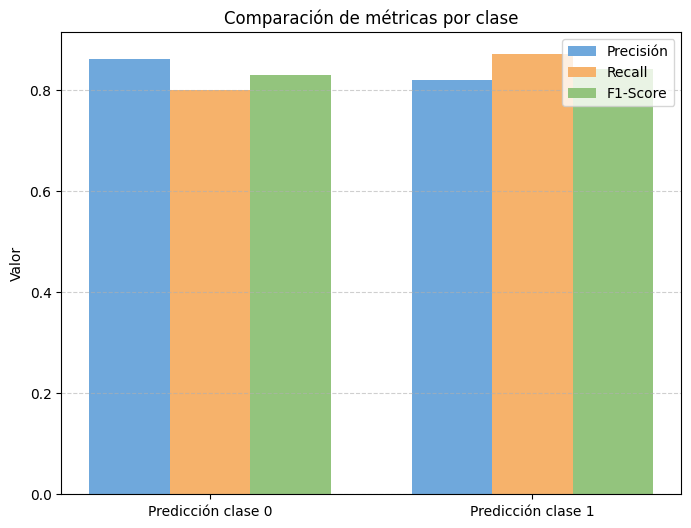

In [56]:
x = range(len(categorias))
ancho = 0.25

plt.figure(figsize=(8,6))
plt.bar([i - ancho for i in x], valores_precision, width=ancho, label="Precisi√≥n", color="#6FA8DC")
plt.bar(x, valores_recall, width=ancho, label="Recall", color="#F6B26B")
plt.bar([i + ancho for i in x], valores_f1, width=ancho, label="F1-Score", color="#93C47D")

plt.xticks(x, categorias)
plt.ylabel("Valor")
plt.title("Comparaci√≥n de m√©tricas por clase")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


###Gr√°fico de torta, distribuci√≥n de aciertos por clase

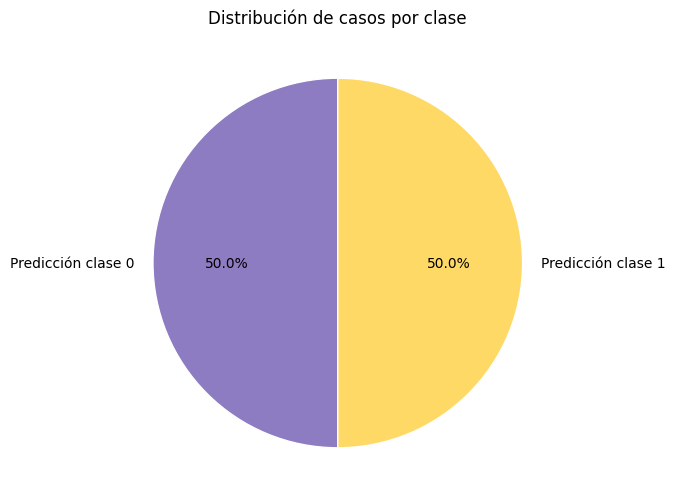

In [57]:
aciertos = [1549, 1549]  # soporte de cada clase
plt.figure(figsize=(6,6))
plt.pie(aciertos, labels=categorias, autopct="%1.1f%%", startangle=90,
        colors=["#8E7CC3", "#FFD966"], wedgeprops={"edgecolor":"white"})
plt.title("Distribuci√≥n de casos por clase")
plt.show()




###Gr√°fico de barras, accuracy y promedios globales

Qu√© muestra: el desempe√±o global del modelo.

Interpretaci√≥n: da la idea de qu√© tan bien clasifica en general, pero puede enga√±ar si las clases est√°n desbalanceadas.

Decisi√≥n: usarlo como referencia, pero mirar siempre tambi√©n recall y F1 para no tomar una decisi√≥n basada solo en accuracy.


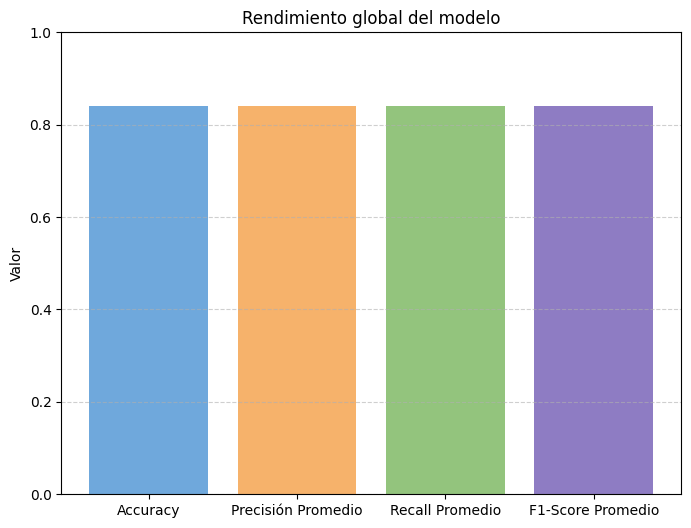

In [58]:
metricas_globales = ["Accuracy", "Precisi√≥n Promedio", "Recall Promedio", "F1-Score Promedio"]
valores_globales = [0.84, 0.84, 0.84, 0.84]

plt.figure(figsize=(8,6))
plt.bar(metricas_globales, valores_globales, color=["#6FA8DC","#F6B26B","#93C47D","#8E7CC3"])
plt.ylim(0,1)
plt.ylabel("Valor")
plt.title("Rendimiento global del modelo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()